# Results
- Models used with hyperparameters: Linear Regression, Linear Regression with SGD, Linear Regression with regularization, KNN regressor, Polynomial Regression, Polynomial with regularization, Linear SVM, SVM with kernel, Decision Tree Regressor
- Best Model parameters: {'regressor': ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False), 'regressor__alpha': 0.05, 'regressor__l1_ratio': 0.6}
- Mean Cross validation score of Best model: 0.17565814244364447
- Test score of best model: Accuracy on test set: 0.1830367376251094
- Train score of best model: Accuracy on training set: 0.16434824320899577

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
import pandas as pd

data_pat = pd.read_csv(r'patent_data.csv')
data_pat.head()

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,3,6,2000,1997,3,711,596125,156,54,0.65505,5019564.222,6,3,2,0.000022,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,3,22,2000,1997,1,711,755619,261,5,0.32000,5578147.000,0,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,5,22,2000,1995,3,712,357270,32,28,0.63778,5072923.000,25,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,3,13,2000,1997,2,712,551495,261,4,0.37500,5787045.000,1,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,3,9,2000,1997,3,712,252865,553,7,0.24491,5696488.857,5,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


In [43]:
data_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [44]:
data_pat['FT'].value_counts()

2    43805
3    16262
1     4556
6      467
4      292
5       78
7       75
Name: FT, dtype: int64

In [45]:
data_pat.UMC.unique()
data_pat['UMC'].value_counts()
(data_pat['UMC'].value_counts()/data_pat['UMC'].count())*100

345    7.296864
382    5.589380
707    5.212482
711    5.107195
714    4.953079
         ...   
134    0.001526
525    0.001526
602    0.001526
54     0.001526
401    0.001526
Name: UMC, Length: 260, dtype: float64

In [46]:
(data_pat['firm'].value_counts()/data_pat['firm'].count())*100

280070    10.566873
0          7.516594
252865     2.796979
706518     2.221714
654319     2.209506
            ...    
173210     0.001526
748532     0.001526
750752     0.001526
740519     0.001526
79865      0.001526
Name: firm, Length: 8238, dtype: float64

In [7]:
#There are a lot of variables with 0 values - remove variables with morethan 40% 0 values
zero_dict={}
for var in data_pat.columns:
    data_zero = data_pat[data_pat[var]==0]
    zero_counts = (data_zero.shape[0]/data_pat[var].count())*100
    zero_dict[var]=zero_counts
print(zero_dict)

discretize=[]
for key, value in zero_dict.items():
    #print(key,value)
    if zero_dict[key] > 50:
        discretize+=[key]
print(discretize)

{'pat': 0.0, 'fwd': 1.6617074845502404, 'lag_d': 0.0030518043793392844, 'lag_y': 0.5859464408331426, 'noc': 0.0, 'gy': 0.0, 'ay': 0.0, 'noi': 0.0, 'UMC': 0.0, 'firm': 7.516594186312657, 'MSA': 0.0, 'tbm': 1.091020065613794, 'tbru': 14.850080109864958, 'PAG': 1.091020065613794, 'npr': 48.09185931181811, 'fpr': 69.2484931715877, 'FT': 0.0, 'Cent': 83.07316700999466, 'EXP_Y': 49.616235599298086, 'DT': 69.93514915693903, 'IT': 79.77569237811856, 'RT': 85.11482413977264, '3rd_PT': 98.84794384679942, 'Rnd_Int': 41.90585183489738, 'FS': 4.241393527107813}
['fpr', 'Cent', 'DT', 'IT', 'RT', '3rd_PT']


In [3]:
#making FT, UMC, MSA, firm, ay, gy a categorical variable
categorical=['gy','ay','firm','UMC','MSA','FT']

In [4]:
continuous=list(set(list(data_pat.columns))-set(categorical))

In [5]:
data_pat[categorical]=data_pat[categorical].astype('O')

In [6]:
continuous.remove('fwd')

In [15]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

outliers_dict={}
for var in continuous:
    upper_boundary, lower_boundary = find_boundaries(data_pat, var,1.5)
    outliers = np.where(data_pat[var] > upper_boundary, True,
                    np.where(data_pat[var] < lower_boundary, True, False))
    outliers_dict[var]=data_pat.loc[outliers, var]  

for key, value in outliers_dict.items():
    print(key, outliers_dict[key].count(),outliers_dict[key].min(),outliers_dict[key].max())

pat 133 4184347 4270205
fpr 9048 3 91
IT 13254 0.006490000000000001 3161.84589
lag_d 1947 0 5285
Cent 11093 5e-09 0.33853034
RT 9755 0.04545 87.44444
Rnd_Int 1353 0.18264 1639.0
PAG 1039 0.0 3570014.6
noi 2205 7 32
DT 11010 1.6666599999999998 46.0
tbm 4524 26 745
lag_y 2886 0 14
npr 8494 6 692
tbru 0 nan nan
FS 134 553.0 854.0
noc 3228 47 375
EXP_Y 3933 6.28571 24.0
3rd_PT 755 0.058820000000000004 8.25


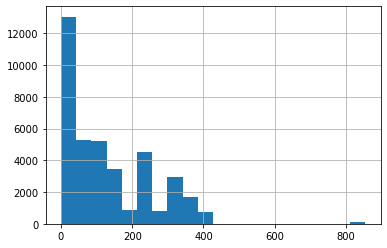

In [52]:
data_pat['FS'].hist(bins=20)

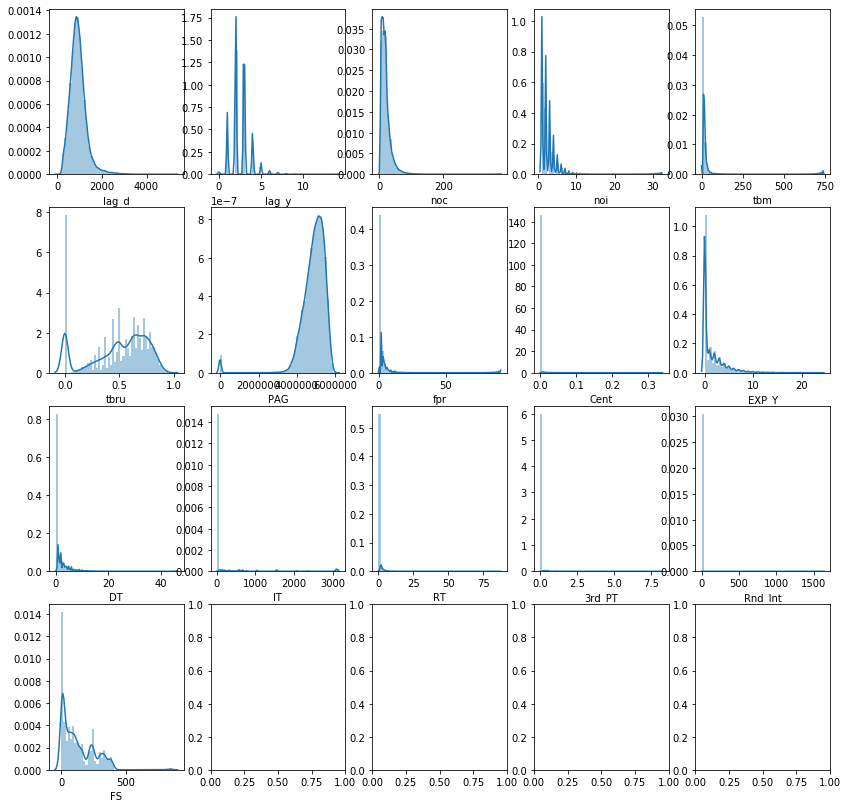

In [54]:
#exploring all continuous variables

fig, axs = plt.subplots(ncols=5, nrows=4,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.distplot(data_pat[data_pat[var].notnull()][var], ax=axs[i]);

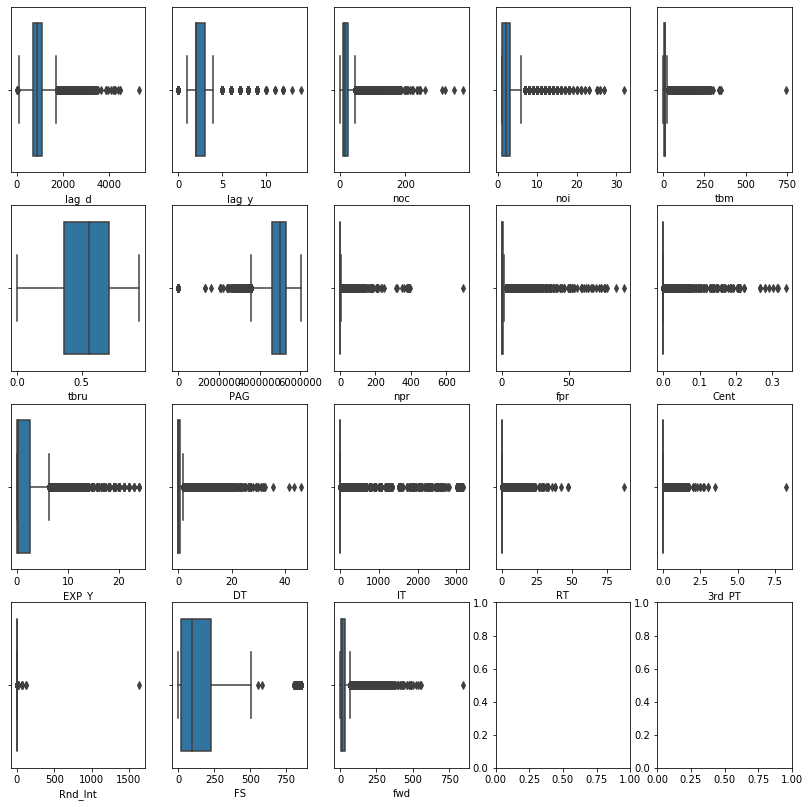

In [9]:
# exploring outliers in the variables
fig, axs = plt.subplots(ncols=5, nrows=4,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(continuous + ['fwd']):
    sns.boxplot(data_pat[data_pat[var].notnull()][var], ax=axs[i], orient='h');

In [10]:
#these variables have outliers
transform=[]
for key, value in outliers_dict.items():
    if outliers_dict[key].count()>0:
        transform+=[key]
print(transform)

['lag_d', 'lag_y', 'noc', 'noi', 'tbm', 'PAG', 'npr', 'fpr', 'Cent', 'EXP_Y', 'DT', 'IT', 'RT', '3rd_PT', 'Rnd_Int', 'FS']


In [11]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

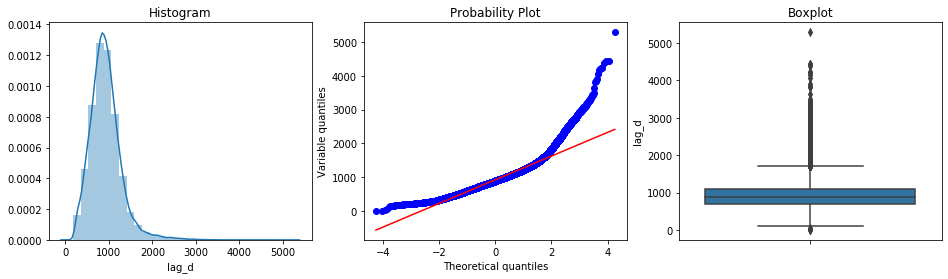

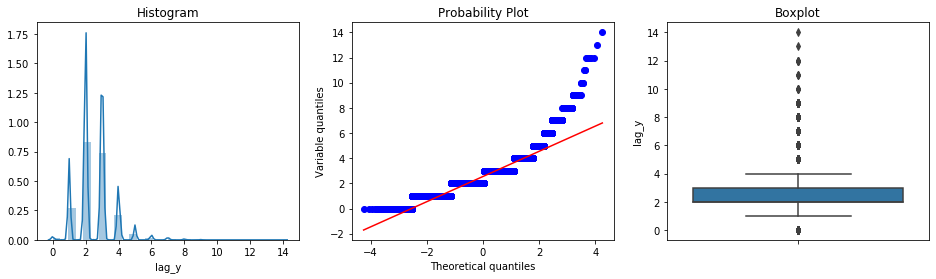

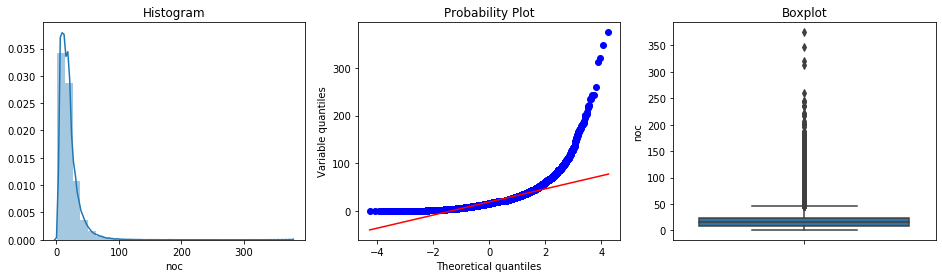

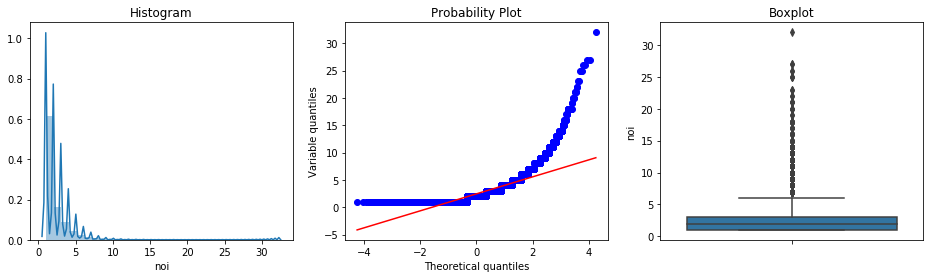

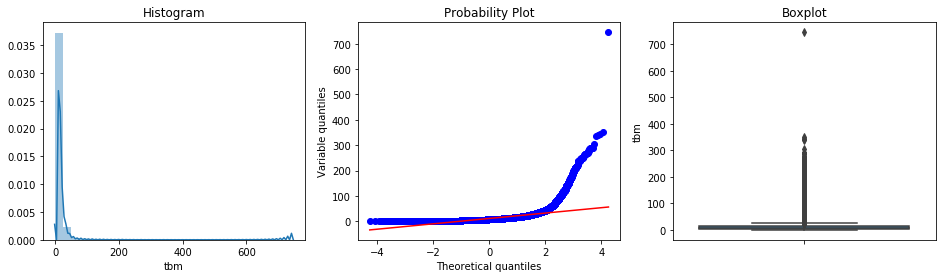

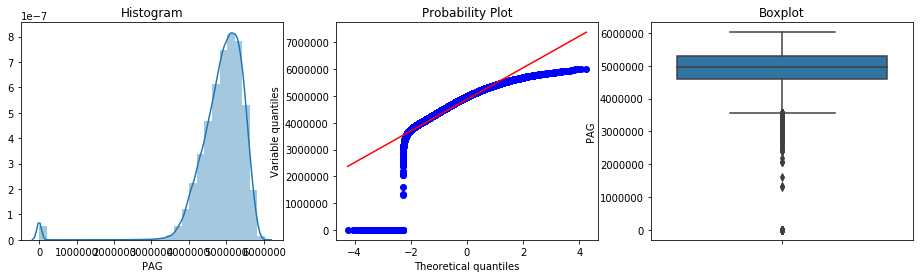

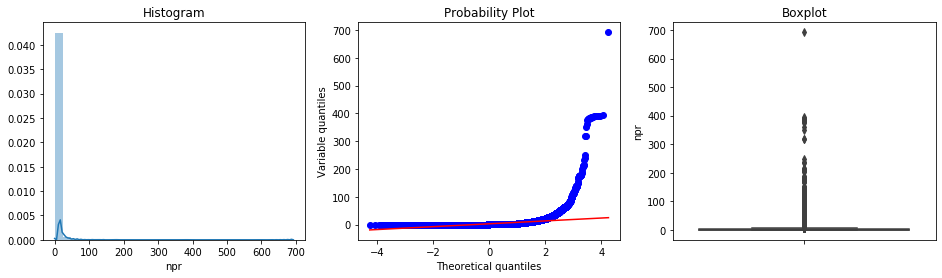

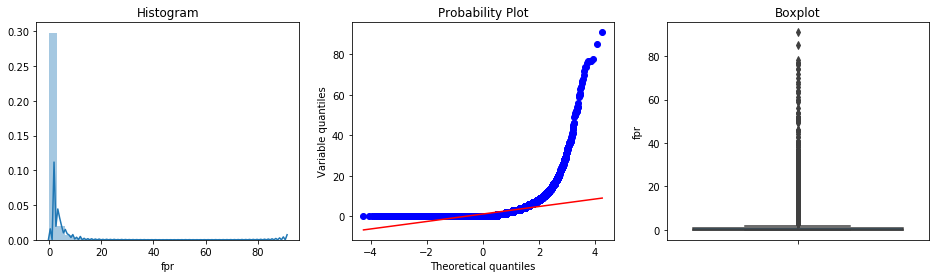

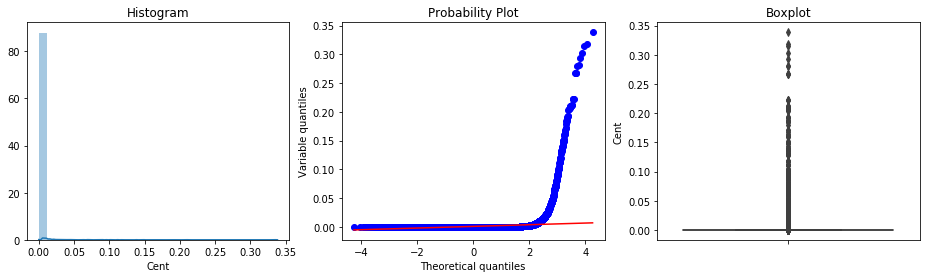

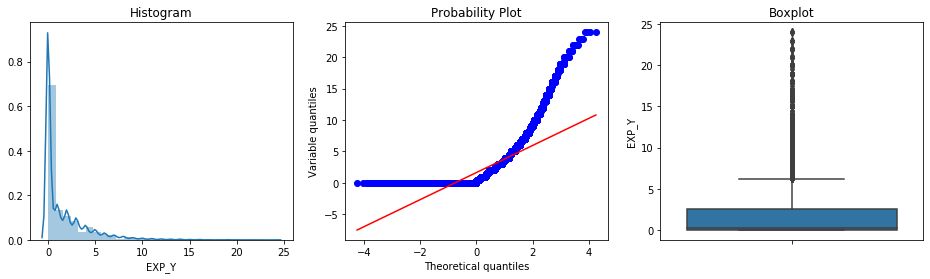

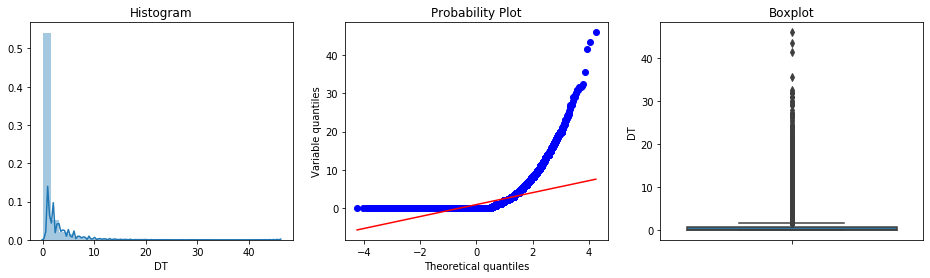

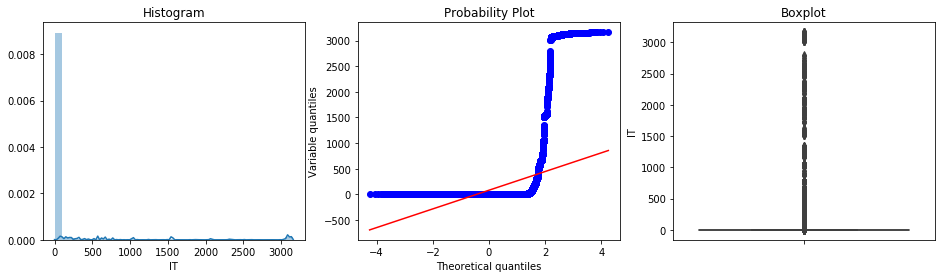

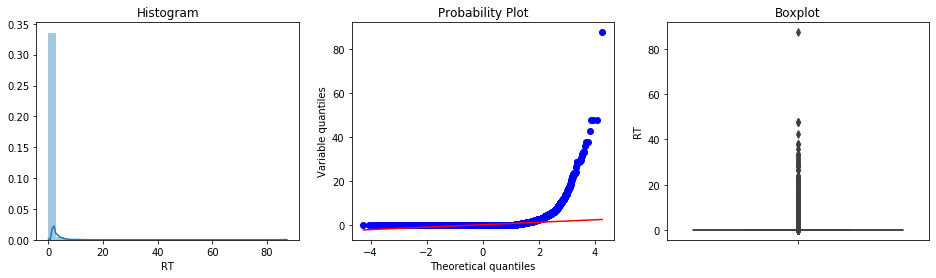

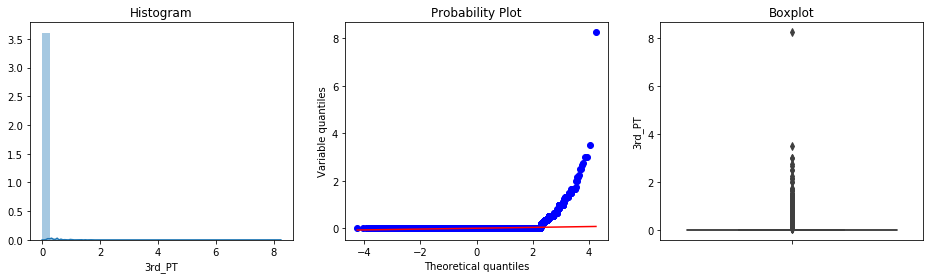

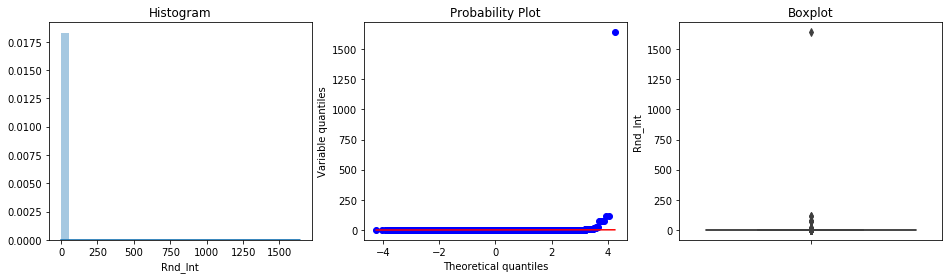

/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/shinnyjain/opt/anaconda3/envs/buan6341_2020/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


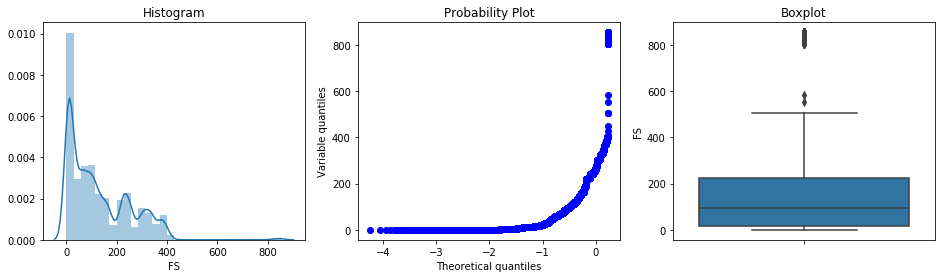

In [12]:
for variable in transform:
    diagnostic_plots(data_pat, variable)

In [11]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_pat.drop(['fwd'], axis=1),
                                                    data_pat['fwd'],
                                                    test_size=0.4,
                                                    random_state=0)

X_train.shape, X_test.shape

((39321, 24), (26214, 24))

In [16]:
X_train_trimmed_exp = X_train.loc[~(np.where(X_train['EXP_Y'] > find_boundaries(X_train, 'EXP_Y', 1.5)[0], True,
                       np.where(X_train['EXP_Y'] < find_boundaries(X_train, 'EXP_Y', 1.5)[1], True, False)))]


In [17]:
y_train_trimmed_exp = y_train.loc[~(np.where(X_train['EXP_Y'] > find_boundaries(X_train, 'EXP_Y', 1.5)[0], True,
                       np.where(X_train['EXP_Y'] < find_boundaries(X_train, 'EXP_Y', 1.5)[1], True, False)))]

In [18]:
X_train_trimmed_exp.shape,y_train_trimmed_exp.shape

((36910, 24), (36910,))

In [19]:
X_test_trimmed_exp = X_test.loc[~(np.where(X_test['EXP_Y'] > find_boundaries(X_test, 'EXP_Y', 1.5)[0], True,
                       np.where(X_test['EXP_Y'] < find_boundaries(X_test, 'EXP_Y', 1.5)[1], True, False)))]


In [20]:
y_test_trimmed_exp = y_test.loc[~(np.where(X_test['EXP_Y'] > find_boundaries(X_test, 'EXP_Y', 1.5)[0], True,
                       np.where(X_test['EXP_Y'] < find_boundaries(X_test, 'EXP_Y', 1.5)[1], True, False)))]

In [21]:
X_test_trimmed_exp.shape, y_test_trimmed_exp.shape

((24692, 24), (24692,))

In [22]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine.variable_transformers import PowerTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine import discretisers as de
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.outlier_removers import Winsorizer
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine.variable_transformers import BoxCoxTransformer

In [23]:
patent_pre_process2 = Pipeline([
    
    # missing data imputation 
   ('end_trail_imputation', mdi.EndTailImputer(distribution='skewed', tail='right',
                         variables=['FS'])),
    
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
    #('categorical_enc', ce.MeanCategoricalEncoder(variables = categorical)),

    # Transforming Numerical Variables
   ('yjt', PowerTransformer(variables = continuous)),

    
    # discretisation and encoding
   ('treeDisc',  de.DecisionTreeDiscretiser(cv=2, scoring='neg_mean_squared_error',
                               regression=True,
                               param_grid={'max_depth': [1,2,3,4,5,6]})),
    #('equalfrequency', EqualFrequencyDiscretiser(q=10, variables = discretize)), 

    # feature Scaling
     ('scaler', StandardScaler()),
    

])

In [24]:
patent_pre_process2.fit(X_train_trimmed_exp,y_train_trimmed_exp)

Pipeline(memory=None,
         steps=[('end_trail_imputation',
                 EndTailImputer(distribution='skewed', fold=3, tail='right',
                                variables=['FS'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.01,
                                             variables=['gy', 'ay', 'firm',
                                                        'UMC', 'MSA', 'FT'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['gy', 'ay', 'fi...
                                         scoring='neg_mean_squared_error',
                                         variables=['pat', 'lag_d', 'lag_y',
                                                    'noc', 'noi', 'tbm', 'tbru',
                                                    'PAG', 'npr', 'fpr', 'Cent',
                                             

In [25]:
X_train=patent_pre_process2.transform(X_train_trimmed_exp)
X_test=patent_pre_process2.transform(X_test_trimmed_exp)

In [26]:
y_train=y_train_trimmed_exp
y_test=y_test_trimmed_exp

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#Linear Regression
from sklearn.linear_model import LinearRegression
#Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
#leave one out
from sklearn.model_selection import LeaveOneOut
#SGD
from sklearn.linear_model import SGDRegressor
#SGD with Grid Search and CV
from sklearn.model_selection import GridSearchCV
#Polynomial Features
from sklearn.preprocessing  import PolynomialFeatures
#Ridge, Lasso, ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#KNN
from sklearn.neighbors import KNeighborsRegressor
#decision tree
from sklearn.tree import DecisionTreeRegressor
#SVM
from sklearn.svm import SVR,LinearSVR

from  sklearn.ensemble import GradientBoostingRegressor

In [28]:
#Different models and their pipelines

model_gs = Pipeline([
    ("regressor", LinearRegression())])
model_sgd=Pipeline([('scaler', MinMaxScaler()),("sgd_reg", SGDRegressor(max_iter=10000, tol = 1e-6))])
model_poly=Pipeline([('polynomialfeatures', PolynomialFeatures()),   
                     ('scaler',MinMaxScaler()),
                     ('norm_reg', LinearRegression())])
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures(degree=2))
    ,('norm_reg',LinearRegression())
])
model_knn=Pipeline([ 
    ('scaler',MinMaxScaler()),
    ('knnreg', KNeighborsRegressor())])
model_decision_tree=Pipeline([("opt_tree",DecisionTreeRegressor(random_state = 0))])
model_svr = Pipeline([("svr", LinearSVR())])
model_svr_kern = Pipeline([("svr_kern", SVR())])
model_gbr = Pipeline([("gbr",GradientBoostingRegressor(random_state=42) )])

In [29]:
#Different hyperparameters for different models

model_gbr_parm = [{'gbr__max_depth': range(2,10),
                  'gbr__n_estimators': range(3,10),
                  'gbr__learning_rate': [0.01,0.1,0.8,1]}]

model_parm_gd = [
    {'regressor': [LinearRegression()]},
    
    { 'regressor': [Ridge()],
      'regressor__alpha':[0.001, 0.01, 0.1, 1, 10] },
    
    {'regressor': [Lasso(random_state=0)],
      'regressor__alpha':[0.001, 0.01,0.04, 0.1, 1, 10]},
    
    {'regressor': [ElasticNet()],
      'regressor__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1,0.05, 1, 10], 'regressor__l1_ratio' :[0.1,0.2,0.4,0.6,0.8]}
]

model_sgd_parm=[
   { 'sgd_reg': [SGDRegressor()],
   'sgd_reg__eta0':[0.01, 0.05, 0.1 ,1] , 'sgd_reg__penalty' :['l1','l2'],'sgd_reg__alpha' :[0.1,0.01,0.001,1]
   },
   { 'sgd_reg': [SGDRegressor()],
    'sgd_reg__eta0':[0.01, 0.05, 0.1 ,1]}
]

model_poly_parm = {'polynomialfeatures__degree':range(1,5)}

model_knn_parm = {'knnreg__n_neighbors': range(1,5)}

model_dt_parm = {"opt_tree__max_depth": range(1,6),
           "opt_tree__min_samples_split": range(2,9),
           "opt_tree__max_leaf_nodes": range(2,8)}

model_svr_parm = [{'svr_kern': [SVR(kernel='rbf')], 
               'svr_kern__C': [0.001, 0.1, 1, 10],
               'svr_kern__gamma': [0.001,  0.1, 1, 10],
                'svr_kern__epsilon': [0.1]},
                  
              {'svr_kern': [SVR(kernel='linear')], 
               'svr_kern__C': [0.001, 0.01, 0.1, 1, 10, 100]},
                  
                {'svr_kern': [SVR(kernel='poly')],
               'svr_kern__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svr_kern__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                'svr_kern__degree': [2,3]},
                  
                 {'svr_kern': [SVR(kernel='sigmoid')], 
               'svr_kern__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'svr_kern__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]},
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]

In [206]:
#knn regression

grid_search_patknn_pipe = GridSearchCV(model_knn, model_knn_parm, cv=5,n_jobs=-1, return_train_score=True)
grid_search_patknn_pipe.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_patknn_pipe.best_params_)
print(grid_search_patknn_pipe.best_score_)
X_train_predknn = grid_search_patknn_pipe.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_predknn)))

{'knnreg__n_neighbors': 4}
-0.03921812296744749
train mse: 677.2091353969114


In [207]:
X_test_predknn=grid_search_patknn_pipe.predict(X_test)
print('test mse: {}'.format(mean_squared_error(y_test, X_test_predknn)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_predknn))))
print('test r2: {}'.format(r2_score(y_test, X_test_predknn)))

test mse: 1165.92299884578
test rmse: 34.14561463564216
test r2: -0.014419782828926753


In [30]:
#Linear Regression

lr= LinearRegression()
lr.fit(X_train,y_train)
scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))
print("train r2: {}".format(lr.score(X_train,y_train)))
print("test r2: {}".format(lr.score(X_test,y_test)))

Cross-validation scores: [0.19855071 0.18846411 0.14856515 0.16794935 0.17305705]
Average cross-validation score: 0.17531727423870433
train r2: 0.18287964907499
test r2: 0.1627654828989239


In [210]:
#Linear Regression with SGD

grid_search_patsgd_pipe=GridSearchCV(model_sgd, model_sgd_parm,cv=5, n_jobs=-1, return_train_score = True)
grid_search_patsgd_pipe.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_patsgd_pipe.best_params_)
print(grid_search_patsgd_pipe.best_score_)
X_train_predsgd = grid_search_patsgd_pipe.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_predsgd)))
X_test_predreg = grid_search_patsgd_pipe.predict(X_test)
print('test mse: {}'.format(mean_squared_error(y_test, X_test_predreg)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_predreg))))
print('test r2: {}'.format(r2_score(y_test, X_test_predreg)))

{'sgd_reg': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), 'sgd_reg__eta0': 0.01}
0.1591726546891835
train mse: 920.9080094322338
test mse: 970.0458412105546
test rmse: 31.145558932383196
test r2: 0.15600456243759586


In [31]:
#Linear Regression with regularization (lasso, ridge, elasticnet)

import warnings
warnings.filterwarnings("ignore")

grid_search_patreg_pipe = GridSearchCV(model_gs, model_parm_gd)
grid_search_patreg_pipe.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_patreg_pipe.best_params_)
print(grid_search_patreg_pipe.best_score_)
X_train_predreg = grid_search_patreg_pipe.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_predreg)))
X_test_predreg = grid_search_patreg_pipe.predict(X_test)
print('test mse: {}'.format(mean_squared_error(y_test, X_test_predreg)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_predreg))))
print('train r2: {}'.format(r2_score(y_train, X_train_predreg)))
print('test r2: {}'.format(r2_score(y_test, X_test_predreg)))

{'regressor': ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False), 'regressor__alpha': 0.05, 'regressor__l1_ratio': 0.6}
0.17565814244364447
train mse: 907.2142068541852
test mse: 960.4560348295379
test rmse: 30.991225126308542
train r2: 0.1830367376251094
test r2: 0.16434824320899577


In [ ]:
#Polynomial regression with parameters - is not running and taking more than 2 hours

grid_search_patpoly_pipe=GridSearchCV(model_poly,model_poly_parm,cv=5, return_train_score = True,scoring='neg_mean_squared_error')
grid_search_patpoly_pipe.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_patpoly_pipe.best_params_)
print(grid_search_patpoly_pipe.best_score_)
X_train_predpoly = grid_search_patpoly_pipe.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_predpoly)))
X_test_predpoly = grid_search_patpoly_pipe.predict(X_test)
print('test mse: {}'.format(mean_squared_error(y_test, X_test_predpoly)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_predpoly))))
print('test r2: {}'.format(r2_score(y_test, X_test_predpoly)))

In [219]:
#Polynomial Regression with Regularization

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True,scoring='r2')
grid_poly.fit(X_train,y_train)

#best cv score, best parameters, MSE train, MSE test
print(grid_poly.best_params_)
print(grid_poly.best_score_)
X_train_predpolyreg = grid_poly.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_predpolyreg)))
X_test_predpolyreg = grid_poly.predict(X_test)
print('test mse: {}'.format(mean_squared_error(y_test, X_test_predpolyreg)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_predpolyreg))))
print('test r2: {}'.format(r2_score(y_test, X_test_predpolyreg)))

{'norm_reg': Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False), 'norm_reg__alpha': 1}
0.1693540931154551
train mse: 909.7808266483627
test mse: 966.3192571464225
test rmse: 31.085676076714538
test r2: 0.15924690399940833


In [212]:
#LinearSVR
import warnings
warnings.filterwarnings("ignore")

model_svr.fit(X_train,y_train)
cv_scores_svc = cross_val_score(model_svr, X_train, y_train)
print("Mean Cross-validation scores: {}".format(cv_scores_svc.mean()))


Mean Cross-validation scores: 0.08593305331992426


In [215]:
print("Train Accuracy: {}".format(model_svr.score(X_train,y_train)))
print("Test Accuracy: {}".format(model_svr.score(X_test, y_test)))

Train Accuracy: 0.0882027113933117
Test Accuracy: 0.0709987914671999


In [389]:
#Support Vector Machine - Kernel - does not run even after letting the program run for 4 hours

grid_search_patsvr_pipe = GridSearchCV(model_svr_kern,model_svr_parm,cv=5,n_jobs=-1)
grid_search_patsvr_pipe.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_patsvr_pipe.best_params_)
print(grid_search_patsvr_pipe.best_score_)
X_train_predsvr = grid_search_housesvr_pipe.predict(X_train)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_predsvr)))

KeyboardInterrupt: 

In [ ]:
X_test_predreg = grid_search_patsvr_pipe.predict(X_test)
print('test mse: {}'.format(mean_squared_error(y_test, X_test_predreg)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_predreg))))
print('test r2: {}'.format(r2_score(y_test, X_test_predreg)))

In [223]:
#Decision Tree Regression

grid_search_dt_pipe = GridSearchCV(model_decision_tree,model_dt_parm,cv=5)
grid_search_dt_pipe.fit(X_train,y_train)

#best cv score, best parameters, MSE train
print(grid_search_dt_pipe.best_params_)
print(grid_search_dt_pipe.best_score_)
X_train_preddt = grid_search_dt_pipe.predict(X_train)
X_test_preddt = grid_search_dt_pipe.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preddt)))
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preddt)))

{'opt_tree__max_depth': 5, 'opt_tree__max_leaf_nodes': 7, 'opt_tree__min_samples_split': 2}
0.07625782540276074
train mse: 1019.2070099011478
test mse: 1063.9821198099355


In [224]:
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preddt))))
print('test r2: {}'.format(r2_score(y_test, X_test_preddt)))

test rmse: 32.61873878325058
test r2: 0.07427462021081421
